In [1]:
!pip install pandas statsmodels
!pip install pmdarima

  Using cached pmdarima-2.0.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.1 MB)
  Using cached Cython-3.0.11-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.6 MB)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

In [2]:
import numpy as np
import pandas as pd
import statsmodels.tsa.api as smt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

import matplotlib.pyplot as plt


In [20]:
# Carregar os dados
data = pd.read_excel("BAse_Hist_eNPS.xlsx")

In [9]:
# Carregar os dados
data = pd.read_excel("Turnover_Mensal_Vol.xlsx")

In [3]:
#data = data.drop(['Meses'],axis=1,inplace=False)
from statsmodels.tsa.arima.model import ARIMA

In [21]:
data

,Meses,eNPS
0,2021-01-01,46.8880
1,2021-02-01,48.4450
2,2021-03-01,48.8725
3,2021-04-01,52.0925
4,2021-05-01,55.7800
5,2021-06-01,63.2725
6,2021-07-01,64.7980
7,2021-08-01,63.8250
8,2021-09-01,65.5800
9,2021-10-01,65.6560


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.10/site-packages/statsmodels

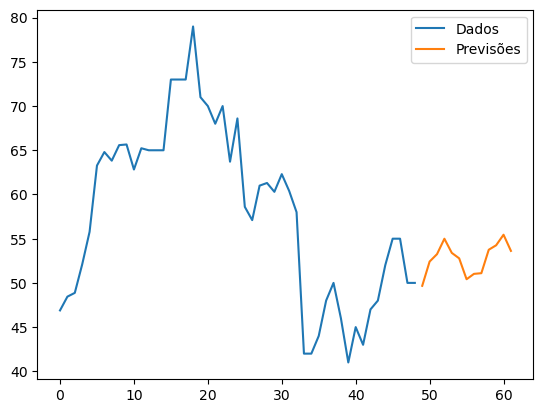

[49.66975129 52.41359637 53.25087568 54.99565286 53.39383495 52.77588559
 50.41375986 51.02107095 51.09747673 53.74907363 54.25472581 55.44836235
 53.61991439]


In [ ]:

# Decompor a série temporal em seus componentes

decomp = seasonal_decompose(data["eNPS"], period=12)  # Para sazonalidade anual
#decomp = seasonal_decompose(data["to_inv"], period=12)  # Para sazonalidade anual

# Supondo que você tenha determinado os valores de p, d e q através de análise ou métodos:
#p = 4
#d = 1
#q = 3

p = 4
d = 2
q = 4

# Agora você pode criar o modelo ARIMA:
model = ARIMA(decomp.observed, order=(p, d, q))
results = model.fit()


# Estimar o modelo ARIMA
model = ARIMA(decomp.observed, order=(p, d, q))

#model = sm.tsa.ARIMA(decomp.observed, order=(p, d, q))
results = model.fit()

# Prever os próximos 6 meses
predictions = results.predict(start=data.shape[0], end=data.shape[0] + 12)

# Obter os valores da previsão
valores_previsao = predictions.values

# Visualizar as previsões
plt.plot(data["eNPS"], label="Dados") #to_inv
#plt.plot(data["to_inv"], label="Dados") 
plt.plot(predictions, label="Previsões")
plt.legend()
plt.show()
print(valores_previsao)


In [ ]:
4,2,1